### White Noise

Why we need to understand this while picking up the right model !!

White noise is the type of time-series data that does not follow a pattern. The data to be white noise, must have following 3 components:

- Constant Mean 

- Constant variance 

- No autocorrelation (in any period)

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

In [2]:
raw_csv_data = pd.read_csv("./../datasets/Index2018.csv") 
df=raw_csv_data.copy()
df.date = pd.to_datetime(df.date, dayfirst = True)
df.set_index("date", inplace=True)
df=df.asfreq('b')
df=df.fillna(method='ffill')

### Removing the unnecessary data 

In [3]:
df['market_value'] = df.spx

In [4]:
df.drop(["spx","ftse", "nikkei","dax"], axis=1, inplace=True)
df.describe()

,market_value
count,6277.000000
mean,1288.642547
std,487.868210
min,438.920000
25%,992.715221
50%,1233.761241
75%,1460.250000
max,2872.867839


In [5]:
train_size = int(df.shape[0] * 0.8)

In [6]:
df_train, df_test = df.iloc[:train_size], df.iloc[train_size:]
df_train.shape, df_test.shape

((5021, 1), (1256, 1))

### Creating white noise 

In [7]:
wn = np.random.normal(loc=df.market_value.mean(), scale=df.market_value.std(), size=df.shape[0])

In [8]:
df['wn'] = wn
df.describe()

,market_value,wn
count,6277.000000,6277.000000
mean,1288.642547,1286.485497
std,487.868210,486.157686
min,438.920000,-424.411228
25%,992.715221,964.781860
50%,1233.761241,1289.615815
75%,1460.250000,1617.970545
max,2872.867839,3107.401674


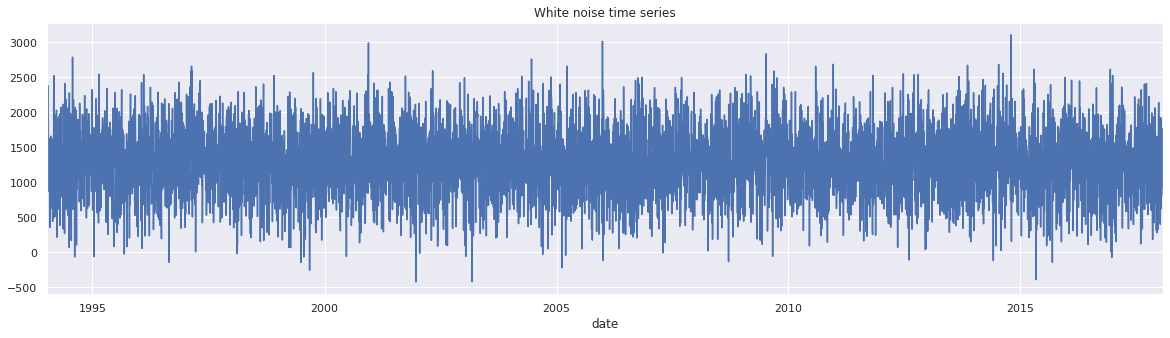

In [9]:
df.wn.plot(figsize=(20,5))
plt.title("White noise time series")
plt.show()

The white noise data have same mean and varinace as the market value data. But, it does not follow the pattern as market value does. Lets plot the market value of S&P 500.

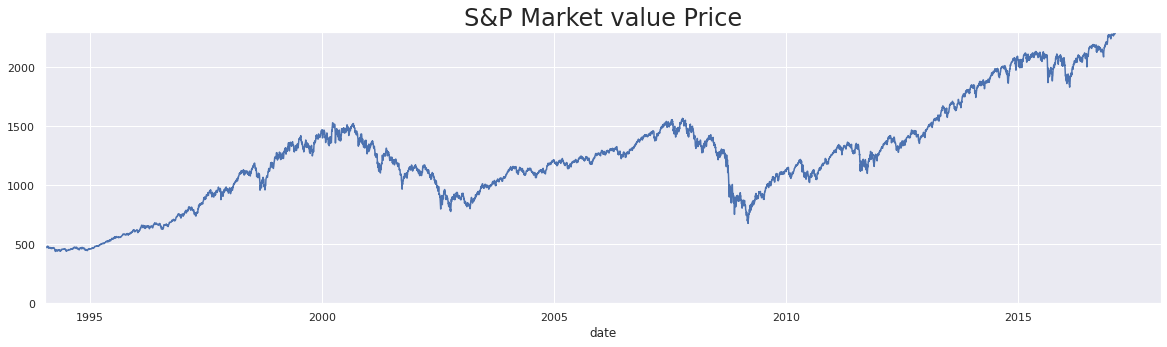

In [10]:
df.market_value.plot(figsize= (20,5))
plt.title("S&P Market value Price", size=24)
plt.ylim(0,2300)
plt.show()

### Random Walk

A special type of time-series, where values tend to persist over time and the differences between periods are simply noise.

$P_t$ = price, and $\epsilon_t$ = residuals

$P_t$ = $P_{t-1}$ + $\epsilon_{t-1}$

where 

$\epsilon_t$ = WhiteNoise( $\mu$, $\sigma^2$)

In [11]:
random_walk = pd.read_csv("./../datasets/RandWalk.csv")
random_walk.head()

,date,price
0,07/01/1994,1122.139662
1,08/01/1994,1135.238562
2,09/01/1994,1109.897831
3,10/01/1994,1080.347860
4,11/01/1994,1082.095245


In [12]:
# convert the date
random_walk.date = pd.to_datetime(random_walk.date,dayfirst=True)
# setting new index, date 
random_walk.set_index("date", inplace=True)
random_walk = random_walk.asfreq('b')

In [13]:
random_walk.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [14]:
# lets add the random walk to df.
df['random_walk'] = random_walk.price
df.head()

,market_value,wn,random_walk
date,,,
1994-01-07,469.90,1503.482430,1122.139662
1994-01-10,475.27,1320.080705,1080.347860
1994-01-11,474.13,267.824560,1082.095245
1994-01-12,474.17,1122.265344,1083.639265
1994-01-13,472.47,1243.350302,1067.146255


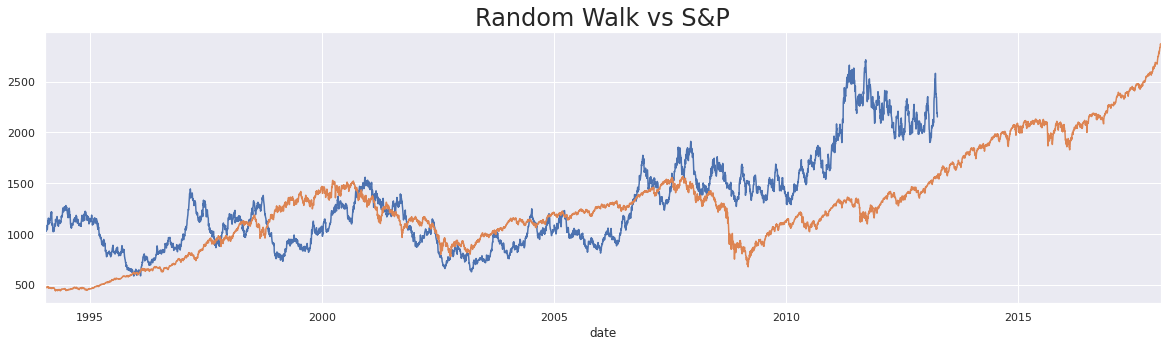

In [15]:
df.random_walk.plot(figsize= (20,5))
df.market_value.plot(figsize= (20,5))
plt.title("Random Walk vs S&P", size=24)
plt.show()

From the graph, Both (random walk, and S&P) have similar graph. It also has cyclical increase and decrease in short period of time on graph.

### Market efficiency 

It measures the level of difficulty in forecasting the correct future values. For instance, if a time-series resembles random walk, the prices can not be predicted with great accuracy.

It seems that the white noise and random walk on time-series data are similar, But that is not the case by looking at the graph.

### Stationarity 

---#----#----

-----#------#----

$Cov(S_1)$ = $Cov(S_2)$

The data taken from time-series data at random have same covariance, is stationary (weak, or covariance stationarity).

Must have the following condition met:

- Constant $\mu$
- Constant $\sigma^2$
- $Cov(X_n,X_{n+k})$ = $Cov(X_m, X_{m+k})$


#### Strict Stationarity (Rare)
$(X_t, X_{t+k}) \sim Dist(\mu, \sigma^2)$

$(X_{t+\tau}, X_{t+\tau +k}) \sim Dist(\mu, \sigma^2)$

*In real world, Stationarity = Covariance stationarity.*


### Determining the statioanry of the data

Dickey-Fuller (DF) test 

$H_0:$ **Non-stationarity** the test statistics $(1\%, 5\%, 10\%) < $ critical value  $ \rho > 0.05$

$H_1:$ **Stationary** the test statistics $(1\%, 5\%, 10\%) >=$ critical value   $\rho < 0.05$



In [16]:
sts.adfuller(df.market_value)

(1.1194986381728393,
 0.9953796476080692,
 10,
 6266,
 {'1%': -3.4313940441948807,
  '5%': -2.8620013751563964,
  '10%': -2.567015587023998},
 50258.209867750025)

Non-Stationary process.

In [17]:
sts.adfuller(df.wn)

(-79.5467930339956,
 0.0,
 0,
 6276,
 {'1%': -3.4313923799633836,
  '5%': -2.862000639842268,
  '10%': -2.567015195598801},
 94953.45936224559)

### Seasonality

Certain trends on cyclical basis. 

##### Decomposition

Split into 3 effects:

- Trends - Pattern through out the data 
- Seasonal - Cyclical effects 
- Residual - Error of prediction


Naive Decomposition: We expect linear relationship between three parts. 
- Additive: $Observed = trend + Seasonal + residual$
- Multiplicative: $Observed = trend * Seasonal * residual$

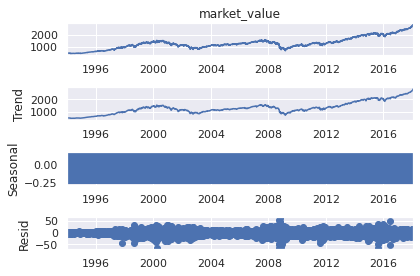

In [24]:
seas_additive_dcomp = seasonal_decompose(df.market_value, model='additive')
seas_additive_dcomp.plot()
plt.show()

This graph suggest no seasonality in the data.

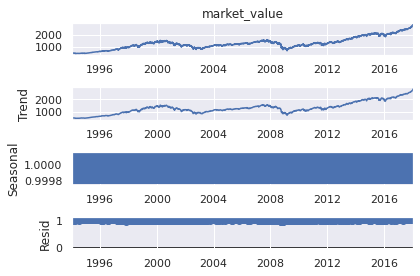

In [25]:
seas_multiplicative_dcomp = seasonal_decompose(df.market_value, model='multiplicative')
seas_multiplicative_dcomp.plot()
plt.show()

It is no different than additive dcomposition. Hence, This data has no clear seasonality.

#### Correlation between past and present values 

Correlation measures the similarity in the change of values od two variables.

$Correlation: \rho(x,y)$

In this case, We have single variable $x$. In order to calculate correlation in single variable through time is $Autocorrelation$ - the correlation between a sequence and itself.

#### ACF 

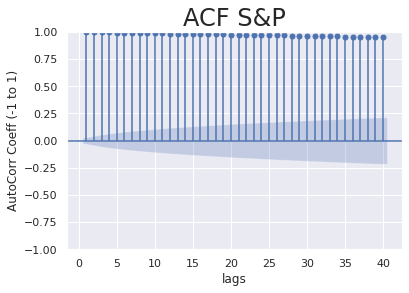

In [29]:
sgt.plot_acf(df.market_value, lags=40, zero=False) 
plt.title("ACF S&P", size=24)
plt.ylabel("AutoCorr Coeff (-1 to 1)")
plt.xlabel("lags")
plt.show()

The blue area in $X-axis$ represents the significance. The area expands as the lag values increase.The greater the distance on time, the more unlikely it is that this autocorrelation persists. For instance: The price from yesterday is more correlated than a month ago.

#### ACF on white noise 

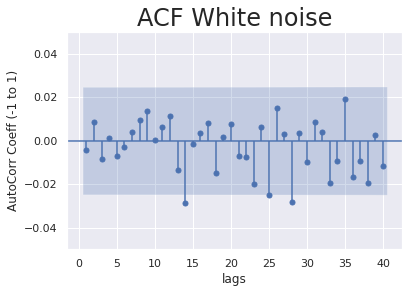

In [31]:
sgt.plot_acf(df.wn, lags=40, zero=False) 
plt.title("ACF White noise", size=24)
plt.ylabel("AutoCorr Coeff (-1 to 1)")
plt.ylim(-0.05, 0.05)
plt.xlabel("lags")
plt.show()

White noise has positive as well as negative correlation. It suggests that there is no auto correlation for any logs, i.e., one of the assumption of white noise.

Lets see about the Random walk variable.

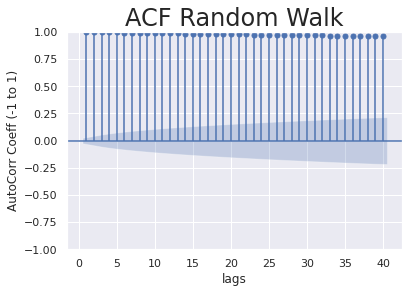

In [36]:
r_w_no_nan = df.random_walk.fillna(method='ffill')
sgt.plot_acf(r_w_no_nan, lags=40, zero=False) 
plt.title("ACF Random Walk", size=24)
plt.ylabel("AutoCorr Coeff (-1 to 1)")
# plt.ylim(-0.001, 0.001)
plt.xlabel("lags")
plt.show()

Here, we imputed the Nan values with forward fill. The SCF plot shows similar AC-coeff to Market Value.

#### PACF (Partial ACF)

In autocorrelation, the lagged value affects the current value either direct or indirect way. For instance, second hand effect. The three days ago value affects the second day ago, and which affects today's value. If we want to compute the direct impact, then we need to compute the partial ACF between $3^rd$ and $1^st$ value.

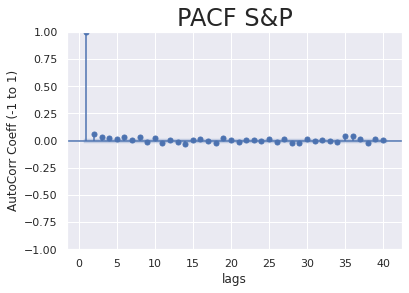

In [40]:
sgt.plot_pacf(df.market_value, lags=40, zero=False, method=('ols'))
plt.title("PACF S&P", size=24)
plt.ylabel("AutoCorr Coeff (-1 to 1)")
plt.xlabel("lags")
plt.show()

##### PACF on White Noise

/home/tsuyog/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


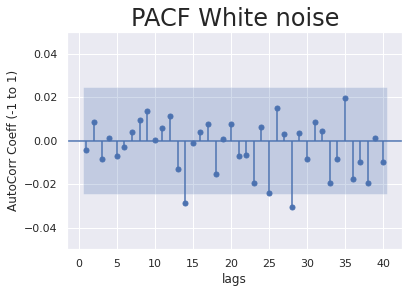

In [42]:
sgt.plot_pacf(df.wn, lags=40, zero=False, method=('ols')) 
plt.title("PACF White noise", size=24)
plt.ylabel("AutoCorr Coeff (-1 to 1)")
plt.ylim(-0.05, 0.05)
plt.xlabel("lags")
plt.show()

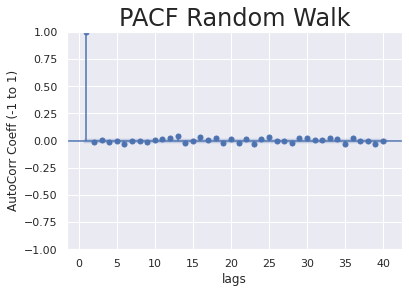

In [45]:
sgt.plot_pacf(r_w_no_nan, lags=40, zero=False, method=('ols')) 
plt.title("PACF Random Walk", size=24)
plt.ylabel("AutoCorr Coeff (-1 to 1)")
# plt.ylim(-0.05, 0.05)
plt.xlabel("lags")
plt.show()